<a href="https://colab.research.google.com/github/Kaif10/ML-ALgorithms-from-scratch/blob/master/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 KMeans from scratch and comparing it with scikit learn's implementation.
Here i have taken a fairly simple and straight forward example.


In [0]:
#import required modules
import matplotlib.pyplot  as plt
import numpy as np
import pandas as pd

#take some random data
x = [1,2,3,4,5,6,11,13,14,15]
y = [1,2,3,4,5,6,11,13,14,15]


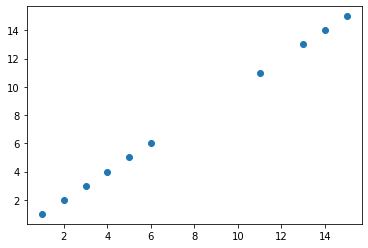

In [90]:
plt.scatter(x,y)

We can clearly see in the above graph that 2 clusters should be formed

.


Here t is a list of points plotted in the graph

In [98]:
t = list(zip(x,y))
t


[(1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (11, 11),
 (13, 13),
 (14, 14),
 (15, 15)]

Randomly choose two points on graph as centroid for two clusters.

In [92]:
c1 = (2,2)
c2 = (4,4)


2

Distance formula

In [0]:
def dist(x1,y1,x2,y2):
    e = (x1-x2)**2 + (y1-y2)**2
    return np.sqrt(e)

.

What we do in the below cell is loop throug all the points in the list t  and check their distance from the two random centroids (c1,c2) we have specified. if dist(i,c1) > dist(i,c2) we specify that the point i belongs to c1 centroid else the poin i belongs to c2 centroid. 

After looping through all the points in list t the points are either grouped in cluster c1 or cluster c2. then the average of all the points in the two respective clusters is taken and two new centroids are formed. this happens until there is no change in centoids and those two centroids are hence the real centroids of the two clusters.

In [0]:
epochs = 500
for j in range(epochs):
    li1 = []
    li2 = []
    count1 = list((0,0))
    count2 = list((0,0))
    for i in t:
        if dist(i[0],i[1],c1[0],c1[1]) <= dist(i[0],i[1],c2[0],c2[1]):
            li1.append((i[0],i[1]))
        else:
            li2.append((i[0],i[1]))
    for i in li1:
        count1[0] += i[0]
        count1[1] += i[1]
    for i in li2:
        count2[0] += i[0]
        count2[1] += i[1]
#co1 and c02 are the new centroids that get updated after every loop until they stop changing.
    co1 = tuple([count1[0]/len(li1),count1[1]/len(li1)]) 

    co2 = tuple([count2[0]/len(li2),count2[1]/len(li2)])
    if co1 ==c1 and co2 == c2:
        break
    else:
      c1 = co1
      c2 = co2

In [106]:
#cluster centroids
print(co1)
print(co2)

(3.5, 3.5)
(13.25, 13.25)


Now lets implement the model with the help of scikit learn.

In [0]:
import numpy as np
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(t)




In [104]:
print(kmeans.labels_)

kmeans.cluster_centers_


[0 0 0 0 0 0 1 1 1 1]


array([[ 3.5 ,  3.5 ],
       [13.25, 13.25]])

The cluster centres(centroids) of both the models are matching. Our model from scratch was implemented correctly.
